In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

td = pd.read_csv("./data/zillow/train_2016.csv", parse_dates=["transactiondate"])
test_panda = td[1:4]
print(test_panda.sum().reset_index())

      index             0
0  parcelid  3.910822e+07
1  logerror -1.506000e-01


Now that we opened the training data, let's explore it's contents

Parcelid serve's as a key to a more detailed properties data, which we will explore later
logerror is what we need to predict as part of this competition.
For further information, please read the competition rules.

Let's explore the transaction date to see the distribution of trasactions in 2016
We will need a little python helper magic to parse the data and visualize it with good old seaborn

count                   90811
unique                    352
top       2016-04-29 00:00:00
freq                      917
first     2016-01-01 00:00:00
last      2016-12-30 00:00:00
Name: transactiondate, dtype: object


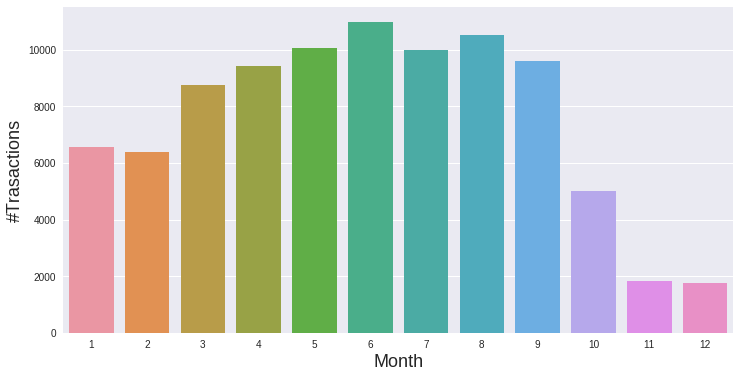

In [2]:
#print the column IDs
#print(td.columns)
#print the first 5 rows in the training data
#print(td.head())
print(td["transactiondate"].describe(include=[np.number]))
td["transactionmonth"] = td["transactiondate"].dt.month
td["transactionyear"] = td["transactiondate"].dt.year


cnt_srs = td["transactionmonth"].value_counts()
# print(cnt_srs)
%matplotlib inline
plt.figure(figsize=(12,6))
sb.barplot(cnt_srs.index, cnt_srs.values)
plt.xlabel("Month", fontsize=18)
plt.ylabel("#Trasactions", fontsize=18)
plt.show()

In [3]:
pdata = pd.read_csv("./data/zillow/properties_2016.csv")
psmall = pdata[1:100]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)
(42,)


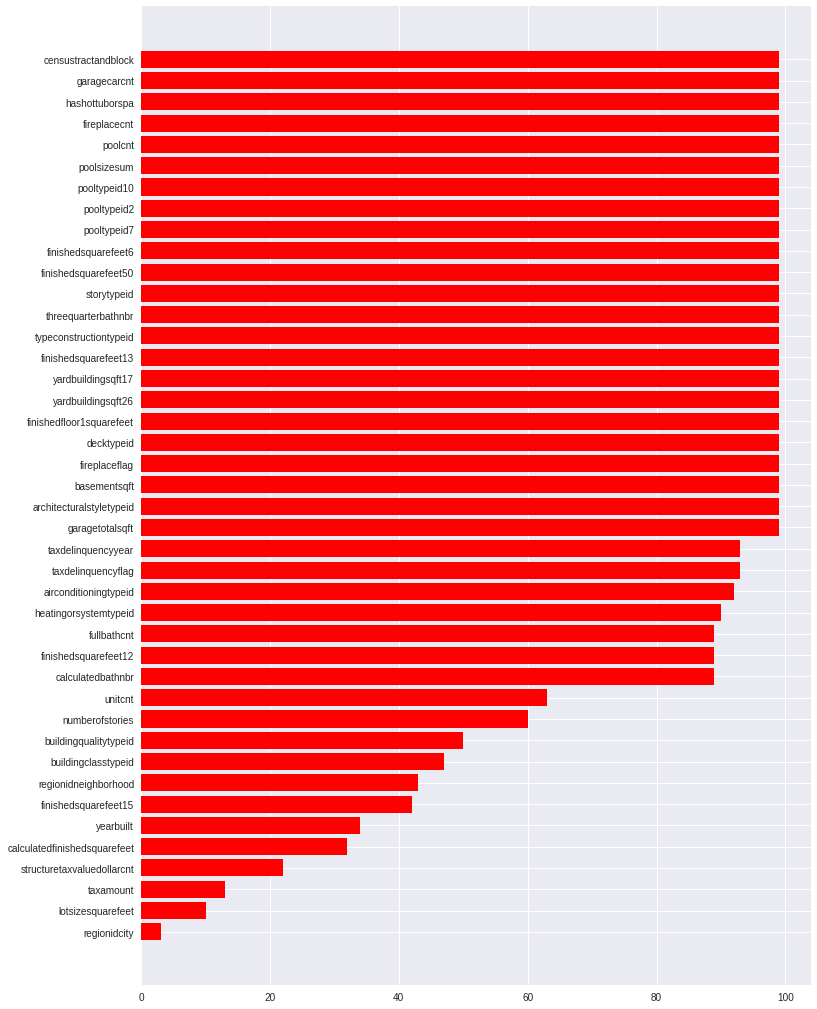

In [4]:
print(pdata.shape)
#print(psmall.columns)
#print(psmall)
ndata = psmall.isnull().sum(axis=0).reset_index()
ndata.columns = ["column_name", "missing_count"]
ndata = ndata.loc[ndata["missing_count"] > 0]
ndata = ndata.sort_values(by="missing_count")
ind = np.arange(ndata.shape[0])
width = 0.8
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, ndata.missing_count.values, color='red')
ax.set_yticks(ind)

num_cols = ndata.column_name.values.shape[0]
new_cols = ndata.column_name.values.reshape(num_cols)
print(new_cols.shape)
ax.set_yticklabels(new_cols, rotation='horizontal')
plt.show()
# print(ind)

### Bivariate Analysis ?

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

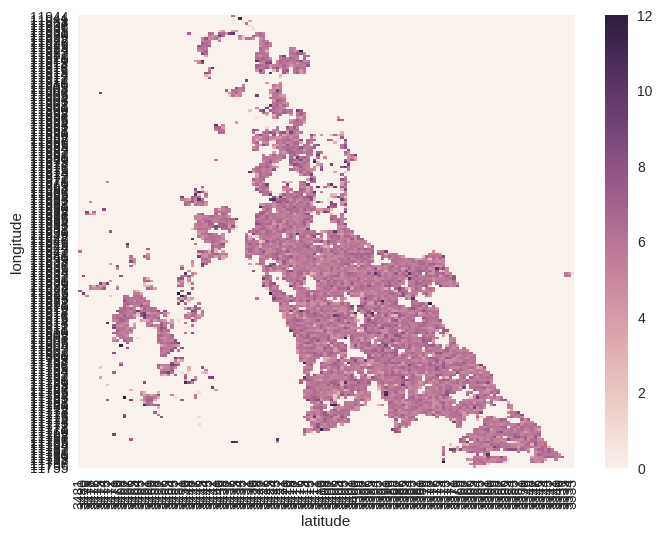

In [114]:
import cufflinks as cf
import plotly.plotly as py
pdm = pd.merge(pdata, td, on='parcelid')
var1_name = "calculatedfinishedsquarefeet"
var2_name = "logerror"
data1 = pdm[var1_name]
data2 = pdm[var2_name]
limit = 20
print(pdm.columns)

def geo_plot(pdm, xvar, yvar, value_var, use_log):
    pdm = pdm[np.isfinite(pdm[xvar])]
    pdm = pdm[np.isfinite(pdm[yvar])]
    pdm = pdm[np.isfinite(pdm[value_var])]
    
    limit = len(pdm)
    # limit = 10
    pdm_small = pdm[0:limit]
    scale_factor=10000
    val_scale_factor=1
    pdm_small[yvar] = (np.abs(pdm_small[yvar]/scale_factor)).astype(int)
    #pdm_small[yvar] = (pdm_small[yvar]/scale_factor).astype(int)
    pdm_small[xvar] = (np.abs(pdm_small[xvar]/scale_factor)).astype(int)
    pdm_small[value_var] = pdm_small[value_var]*val_scale_factor
    #pdm_small.sort_values(by=[xvar], inplace=True, ascending=True)
    #pdm_small.sort_values(by=[yvar], inplace=True, ascending=False)
    if use_log == 1:
        pdm_small[value_var] = np.log(pdm_small[value_var])
    fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    
    hm = pdm_small.pivot_table(index=yvar, columns=xvar, values=value_var, fill_value=0)
    ax = sb.heatmap(hm)
    ax.figure.axes[0].invert_xaxis()
    ax.figure.axes[0].invert_yaxis()
    
# geo_plot(pdm, 'latitude', 'longitude', 'regionidcounty')
geo_plot(pdm, 'latitude', 'longitude', 'transactionmonth', use_log=0)

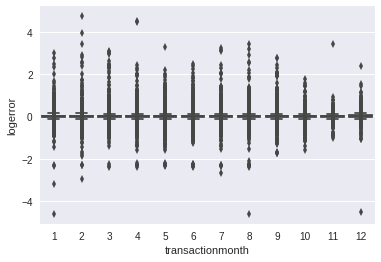

In [124]:
#plt.scatter(pdm_small['latitude'],pdm_small['longitude'])
#print(pdm['transactionmonth'].value_counts())
sb.boxplot(x='transactionmonth', y='logerror', data=pdm)
#ax.scatter(pdm['latitude'], pdm['longitude'], pdm['calculatedfinishedsquarefeet'])
#cols = pdata.columns
#print(cols)
plt.show()

In [155]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

train = pdm
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("logerror")
numerical_features = numerical_features.drop("transactiondate")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
y = train['logerror']
train_num = train[numerical_features]
train_cat = train[categorical_features]


# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print(actuals.shape)
print(predictions.shape)
print(actuals.head())
print("PRed")
print(predictions)
print(mean_squared_error(actuals, predictions))

Numerical features : 54
Categorical features : 5
X_train : (63567, 54)
X_test : (27244, 54)
y_train : (63567,)
y_test : (27244,)
(27244,)
(27244,)
31999   -0.0233
24773   -0.0182
51478    0.0050
75244   -0.0284
20442   -0.0965
Name: logerror, dtype: float64
PRed
[ 0.02038682  0.00972986  0.01057023 ..., -0.03579414  0.01992697
  0.00741151]
0.0256518102445
